# Random Forest Regressor-Notebook made to test the viability of Random Forest Regressor model.

In [1]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df=pd.read_csv("../../Data/Imputed.csv")

In [3]:
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [4]:
#splitting our data to allow for modeling
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [5]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [6]:
#fitting our standard scalar
X_train_ss=ss_x.fit_transform(X_train)

In [9]:
#fitting out minmax scalar
X_train_mm=mm_x.fit_transform(X_train)

# Base

In [10]:
rfr=RandomForestRegressor()

In [11]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [10]:
rfr.score(X_train,y_train)

0.870749846539127

In [10]:
scores= cross_val_score(rfr,X_train,y_train,cv=5)

In [11]:
scores.mean()

0.37123036229638773

Model explaines about  percent of the variance of the data is explained from these models. Let's see how the model reacts with scaled data.

# Standard Scalars

In [12]:
rfr2=RandomForestRegressor()

In [14]:
rfr2.fit(X_train_ss,y_train)

RandomForestRegressor()

In [16]:
rfr2.score(X_train_ss,y_train)

0.8708950381203868

In [17]:
scores1= cross_val_score(rfr2,X_train_ss,y_train,cv=5)

In [18]:
scores1.mean()

0.37048433523690427

# MinMax

In [19]:
rfr3=RandomForestRegressor()

In [20]:
rfr3.fit(X_train_mm,y_train)

RandomForestRegressor()

In [21]:
rfr3.score(X_train_mm,y_train)

0.870424658042018

In [22]:
scores2= cross_val_score(rfr3,X_train_mm,y_train,cv=5)

In [23]:
scores2.mean()

0.3700221694624074

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
rfr4=RandomForestRegressor()

In [45]:
base_param_grid={"max_depth":[2,5,7,10,12,14,16,18,20],"n_estimators":[5,10,100,200,300,400,500],"min_samples_split":[2,4,6,8,10]}

In [46]:
gs_rfr=GridSearchCV(estimator = rfr4, param_grid=base_param_grid,cv=3)

In [ ]:
gs_rfr.fit(X_train,y_train)

In [ ]:
score3=cross_val_score(gs_rfr,X_train,y_train,cv=5)

In [ ]:
score3.mean()

In [30]:
gs_rfr.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [41]:
rfr5=RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=100)

In [42]:
rfr5.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [43]:
rfr5.score(X_train,y_train)

0.4736817708043982

In [31]:
gs_rfr.best_estimator_.feature_importances_

array([1.48559965e-01, 9.46729757e-02, 8.98415503e-03, 1.66518117e-02,
       2.47789685e-02, 5.90221426e-01, 2.82291056e-02, 1.96480166e-03,
       1.10878446e-03, 8.62056481e-04, 4.93467212e-04, 8.12556745e-04,
       6.23384171e-04, 1.49100570e-02, 1.38377721e-02, 7.44308178e-04,
       1.19758486e-04, 6.93885376e-04, 2.40215592e-03, 1.06018626e-02,
       5.93066950e-03, 3.15976935e-03, 2.53633307e-03, 1.69236843e-03,
       7.56427219e-04, 1.81072950e-03, 8.12415216e-04, 1.59251777e-03,
       1.63559607e-03, 1.42326787e-03, 1.58756884e-03, 1.87539624e-03,
       1.91821330e-03, 1.42558128e-03, 9.11615080e-04, 1.11260397e-03,
       1.61163130e-03, 1.02170016e-03, 1.00565814e-03, 7.04988890e-04,
       5.17556632e-04, 1.09530039e-03, 5.57120750e-04, 9.72558374e-04,
       3.37944449e-04, 7.17549646e-04, 3.66091483e-06])

In [33]:
for c,f in zip(X_t.columns,gs_rfr.best_estimator_.feature_importances_):
    print(c,f)

SMOCP 0.15163338121128628
PUMA 0.03071206580651527
NP 0.09012751381954923
BDSP 0.009881116498083601
INSP 0.016307909727251928
RMSP 0.02380533707897935
VALP 0.5564253051260646
TAXAMT 0.0310278975523657
ACR_<1.0> 0.0014890923851602147
ACR_<2.0> 0.0010350568026670547
ACR_<3.0> 0.0008246766369706697
BUS_<1.0> 0.0005209756527422646
BUS_<2.0> 0.0006543144632123152
BUS_<9.0> 0.0004898273439824369
FS_<1.0> 0.01174019651081826
FS_<2.0> 0.01635450143196237
TOIL_<1.0> 0.0008854612664243221
TOIL_<2.0> 6.57084054403593e-05
TOIL_<9.0> 0.0008130174839837707
VEH_<0.0> 0.002476137830684194
VEH_<1.0> 0.011114531931887906
VEH_<2.0> 0.005896968522612652
VEH_<3.0> 0.002448578089715406
VEH_<4.0> 0.002439356038332754
VEH_<5.0> 0.0018992078685565953
VEH_<6.0> 0.0006235148013317065
YBL_<1.0> 0.0021196413518331336
YBL_<2.0> 0.0015739551875196451
YBL_<3.0> 0.0020480618071786793
YBL_<4.0> 0.001883629071638394
YBL_<5.0> 0.001796609396693934
YBL_<6.0> 0.0019022726923244467
YBL_<7.0> 0.0018876952689374827
YBL_<8.0> 

AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

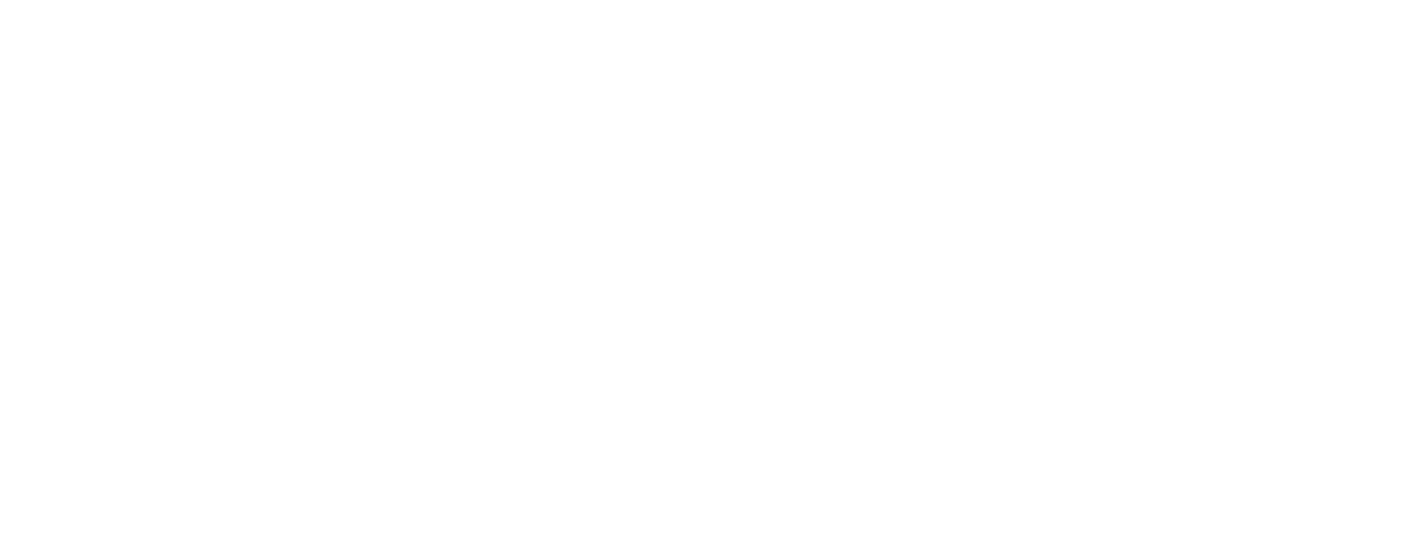

In [12]:
plt.figure(figsize=(25,10))
p=plot_tree(rfr,feature_names=X_train.columns,filled=True,rounded=True, fontsize=14)